##Netflix Filmleri Kümeleme ( Clustering )
Bu projede netflixin 584 adet filmini runtime'a göre kümeleyeceğiz

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('NetflixOriginals.csv', encoding = "ISO-8859-1")

In [3]:
df.sample()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
162,A California Christmas,Romantic comedy,"December 14, 2020",107,5.8,English


In [4]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [5]:
df.tail()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [7]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [8]:
df.corr()

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


In [9]:
df.shape

(584, 6)

In [10]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


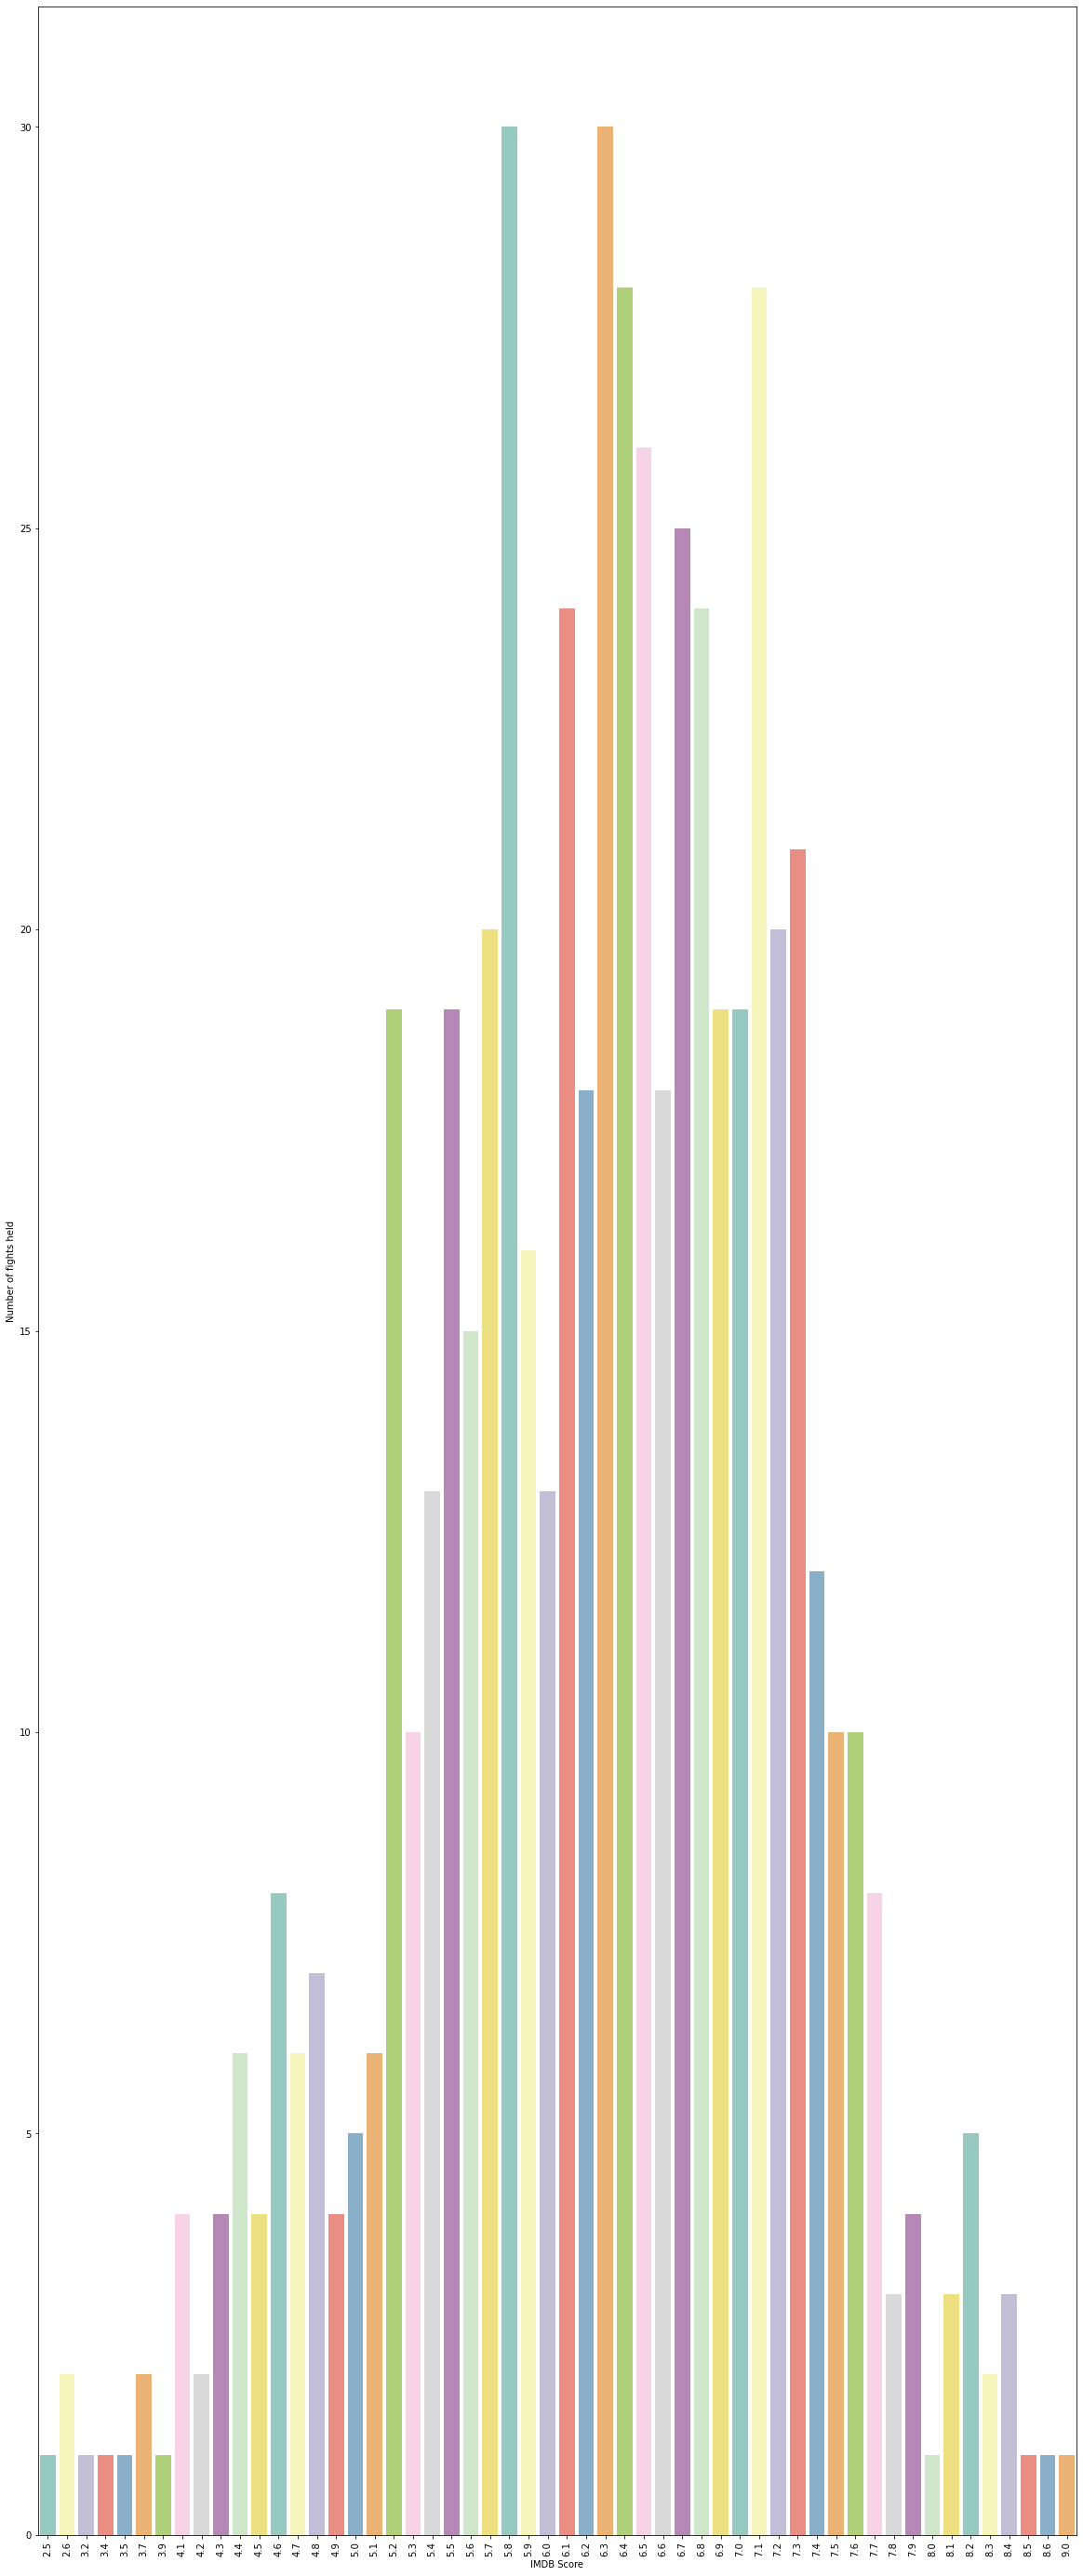

In [11]:
plt.figure(figsize = (20,50))
sns.countplot(x = "IMDB Score", palette = "Set3",data = df)
plt.xticks(rotation = 90)
plt.ylabel("Number of fights held")
plt.show()

In [13]:

df[df.Runtime == 209]['IMDB Score']

561    7.8
Name: IMDB Score, dtype: float64

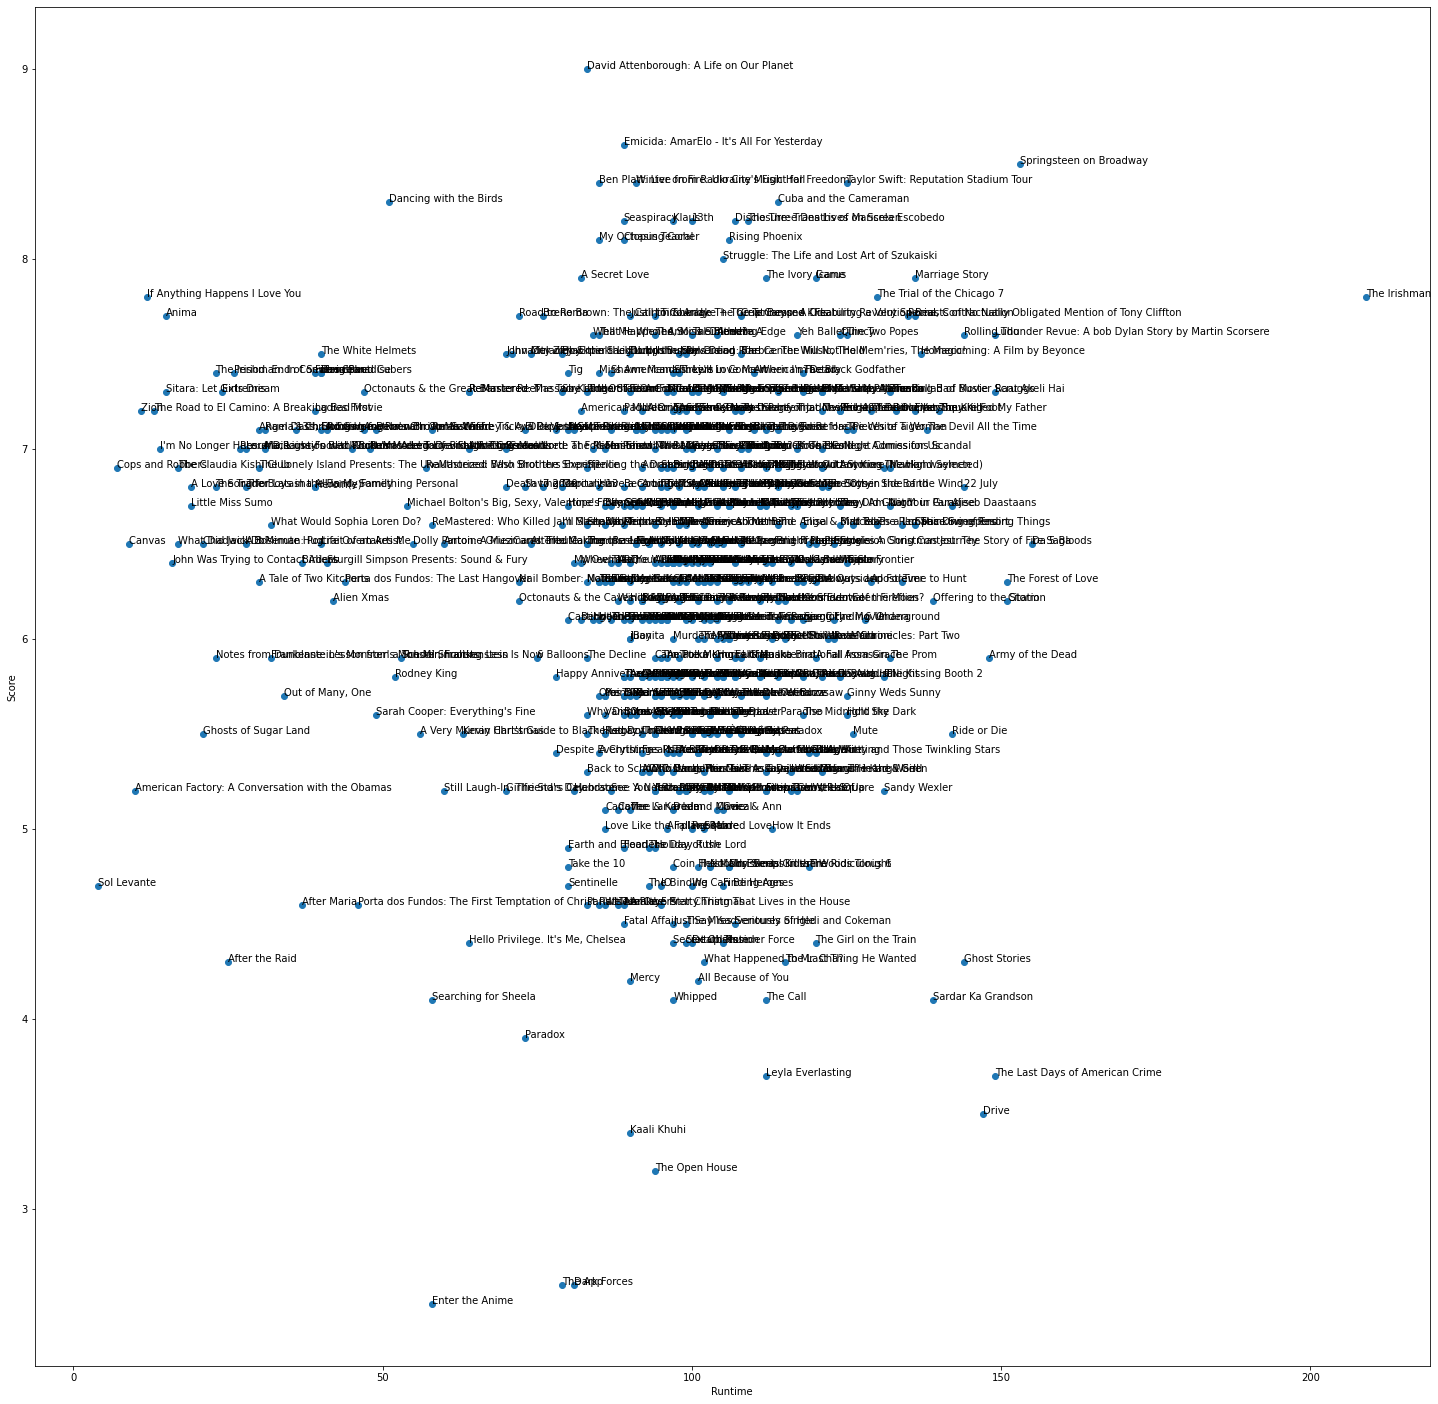

In [15]:
from sklearn.preprocessing import scale
x = df['Runtime'] 
y = df['IMDB Score'] 
plt.figure(figsize = (25,25))
plt.scatter(x, y)
plt.xlabel("Runtime")
plt.ylabel("Score")
for i, txt in enumerate(df.Title):
    plt.annotate(txt, (x[i], y[i])) 
plt.show()

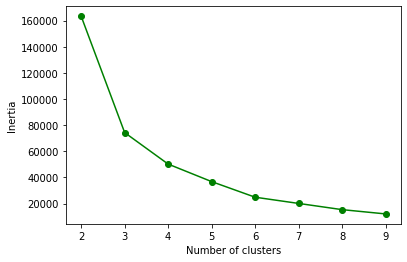

In [17]:
# Dirsek metodu n_cluster sayısını verir bize

from sklearn.cluster import KMeans
X = np.array(list(zip(x,y)))
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(2,10), inertias, "o-g")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


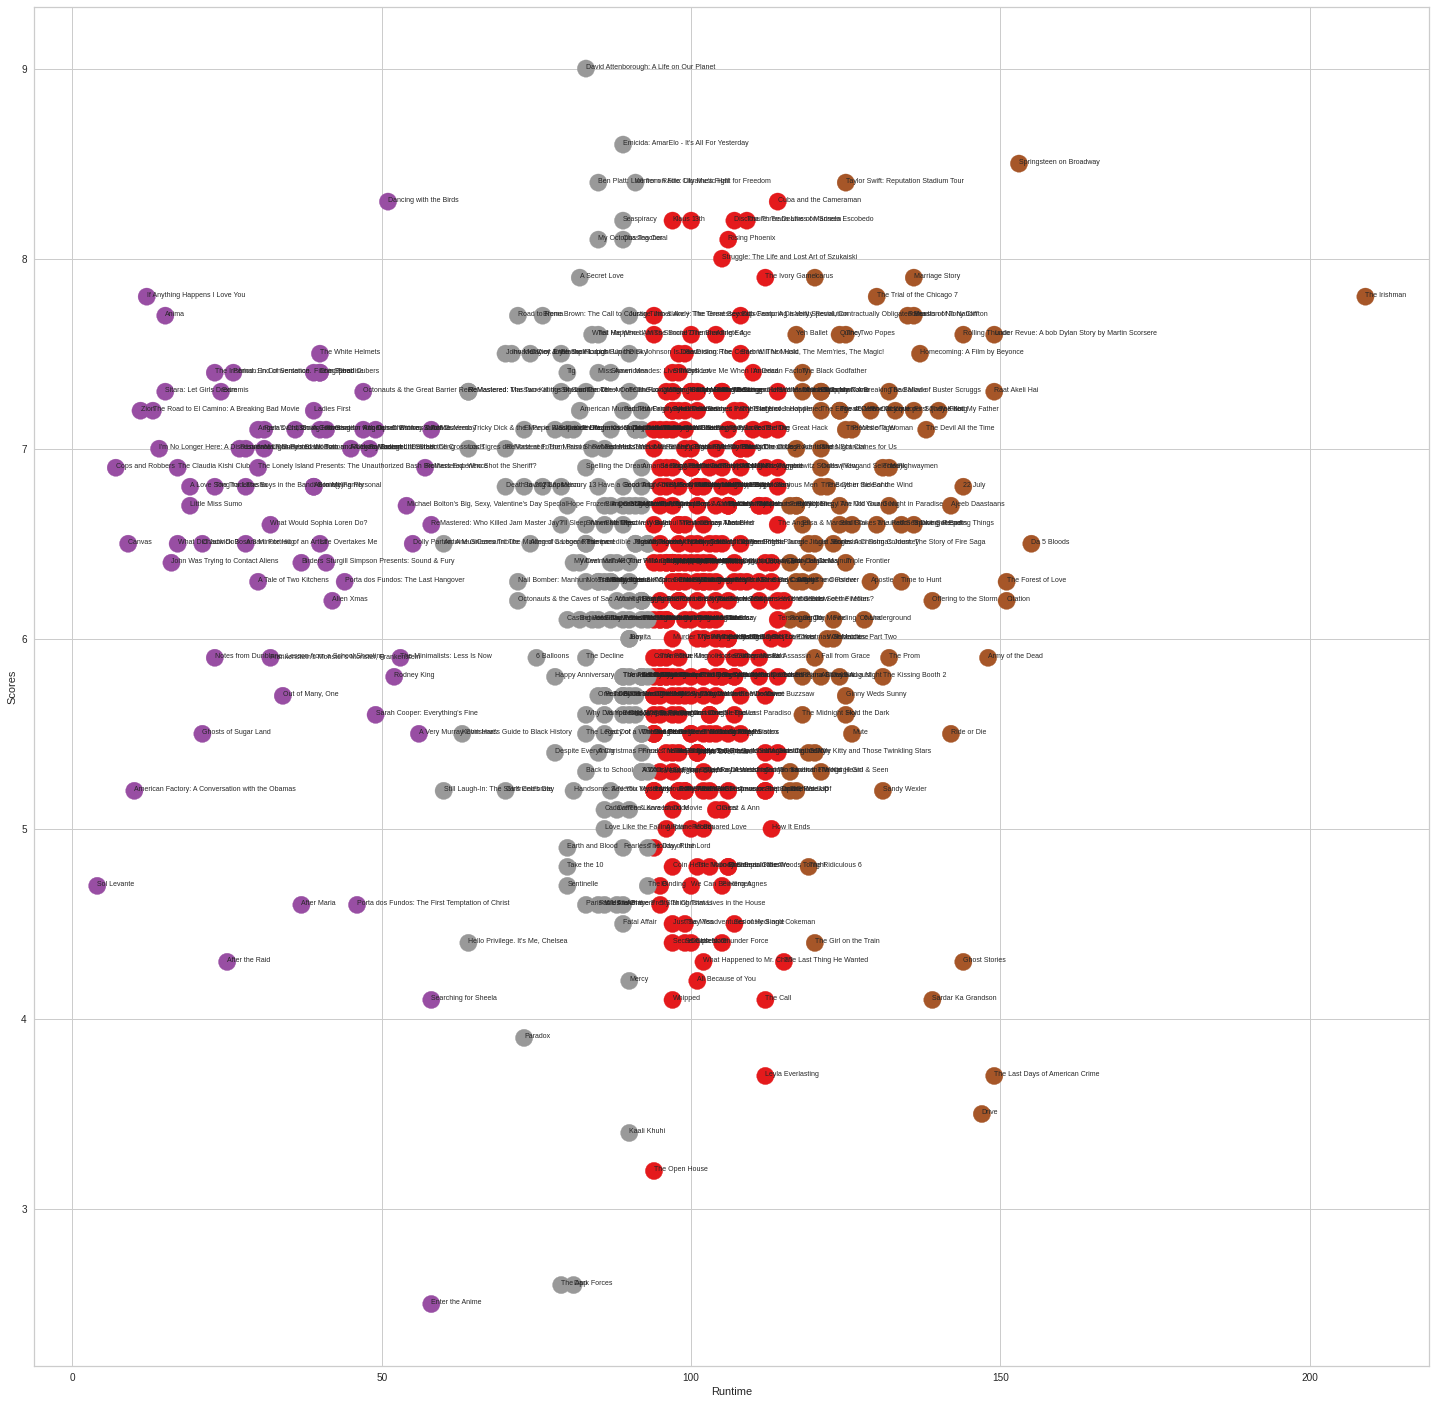

In [23]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.figure(figsize = (25,25))
plt.xlabel("Runtime")
plt.ylabel("Scores")
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=300, cmap='Set1')
for i, txt in enumerate(df.Title):
    plt.annotate(txt, (X[i,0], X[i,1]), size = 7)
plt.show()

In [19]:
from yellowbrick.cluster import KElbowVisualizer

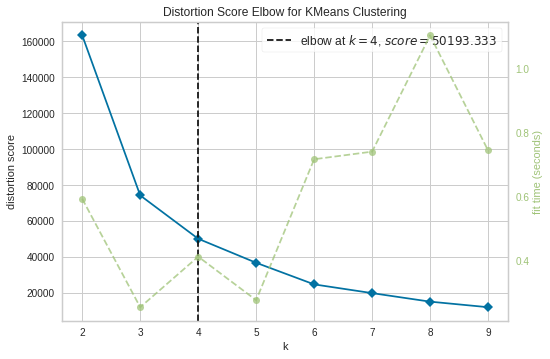

In [22]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X)
visu.poof()

In [27]:
model=KMeans(n_clusters=4)

In [29]:
model=model.fit(X)

In [30]:
pred=model.predict(X)

In [31]:
pred

array([1, 1, 1, 2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 2, 1, 3, 0, 2, 2, 2, 1, 2,
       2, 0, 2, 1, 2, 2, 2, 2, 3, 1, 1, 3, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2,
       2, 2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       3, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 1, 1, 2, 2,
       0, 2, 0, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 3, 2, 1, 2, 0, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 1,
       1, 3, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 3, 1,
       1, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       0, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 2, 0, 2, 2, 3,
       2, 3, 2, 1, 3, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 3, 1, 2, 0, 2, 2, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 3,
       2, 0, 1, 0, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 3, 2, 1, 2, 1, 2, 0, 2,
       1, 0, 0, 2, 1, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2,

In [37]:
x['cluster']=pred

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [42]:
silhouette_score(X,pred)

0.5228776328811419